#Daffa Rizki Rizaly - 2301931251


#Import Library

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import  confusion_matrix, classification_report
import matplotlib.pyplot as plt 



*   Tensorflow used for making the BPNN Model from keras.
*   Pandas used for importing dataset and dataset manipulation
*   StandardScaler for data normalization
*   train_test_split for spliting data into train and test
*   Sequential to use keras BPNN
*   Dense to make dense layer
*   confusion matrix for evaluation of the model by confusion matrix
*   Classification Report for evaluation of the model by F1, Recall, precision
*   matplotlib to plot graphs




In [2]:
#Import Datast
df = pd.read_csv('train.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


The dataset we will be using is income dataset from Kaggle ( https://www.kaggle.com/mastmustu/income ). We will be doing a classification from the features above to determine whether the income is greater than 50k or not.

#Data Preprocessing

In [3]:
#Checking for null
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [4]:
#filling null with nan
df['workclass'].fillna('nan', inplace=True)
df['occupation'].fillna('nan', inplace=True)
df['native-country'].fillna('nan', inplace=True)

In this process, I'll be removing the null by filling the with nan with the fillna from pandas.

In [5]:
#Feature selection using correlation
Correlation = df.corr()
Correlation['income_>50K'].abs().sort_values(ascending = False)

income_>50K        1.000000
educational-num    0.334035
age                0.230988
hours-per-week     0.227918
capital-gain       0.223325
capital-loss       0.145250
fnlwgt             0.006852
Name: income_>50K, dtype: float64

In this process, I'll be using the top 4 features with high correlation with the label that is income_>50k. As shown above, the features I'll be using is educational-num, age, hours-per-week, and capital gain.

In [6]:
#Using top 4 of the features
features = df[['educational-num','age','hours-per-week','capital-gain']].values
label = df['income_>50K'].values.reshape(-1,1)

Here I inserted the features which i will be using into features and the income_>50k into label.

In [7]:
#Normalizing the features
sc = StandardScaler()
features = sc.fit_transform(features)

After that I'll be normalizing the features to improve the outcome of the model. I'll be using the standardScaler. For the label , I won't be using any preprocessing as the labels are already 1s and 0s.

In [8]:
#Spliting data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

I'll be splitting the dataset into 2 part for training and testing. I'll be splitting with test_size of 0.2

#MODEL 1 with 4 input neurons, 2 neurons hidden layer and 1 output layer
In this model, I'll be using tensorflow keras sequential model with the configuration of n,2,1 neurons for input, hidden, output respectively

In [9]:
# define the keras model
model = Sequential()
model.add(Dense(2, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Here i declare the model with sequential and dense. I'll be doing this 2 times with first one using the relu activation and for the ouput using sigmoid.

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

I'll be using binary_crossentropy to calculate the loss as binary_crossentropy good for binary classification and adam optimizer as it's been the move good performing optimizer

In [11]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=10)

Epoch 1/50
2462/2462 [==============================] - 5s 2ms/step - loss: 0.5037 - accuracy: 0.7599 - val_loss: 0.4503 - val_accuracy: 0.7577
Epoch 2/50
2462/2462 [==============================] - 4s 2ms/step - loss: 0.4403 - accuracy: 0.7645 - val_loss: 0.4353 - val_accuracy: 0.7987
Epoch 3/50
2462/2462 [==============================] - 4s 2ms/step - loss: 0.4277 - accuracy: 0.8031 - val_loss: 0.4248 - val_accuracy: 0.8086
Epoch 4/50
2462/2462 [==============================] - 5s 2ms/step - loss: 0.4192 - accuracy: 0.8094 - val_loss: 0.4179 - val_accuracy: 0.8136
Epoch 5/50
2462/2462 [==============================] - 5s 2ms/step - loss: 0.4135 - accuracy: 0.8124 - val_loss: 0.4137 - val_accuracy: 0.8133
Epoch 6/50
2462/2462 [==============================] - 5s 2ms/step - loss: 0.4099 - accuracy: 0.8137 - val_loss: 0.4110 - val_accuracy: 0.8136
Epoch 7/50
2462/2462 [==============================] - 5s 2ms/step - loss: 0.4075 - accuracy: 0.8141 - val_loss: 0.4095 - val_accuracy:

I'll be using 50 epoch wtih 10 batch.

In [12]:
# evaluate the keras model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.3939332962036133
Test accuracy: 81.67652487754822


After that we wil be evaluating the model using couple of methods. First we will see the testing loss and accuracy. In this model, we achieve testing loss of 0.39 and test accuracy of 81,67

In [13]:
Y_pred = model.predict(x_test)
index = 0
for i in Y_pred:
  if Y_pred[index] < 0.5:
    Y_pred[index] = 0
  else:
    Y_pred[index] = 1
  index = index+1
Y_pred = Y_pred.astype(np.int)

we will make y_pred for the evaluating of the model. Because of the model.predict will give float result. so we will be changing the value. if < 0.5 we will changing the value to 0 and if >0.5 we will be changing the value to 1.

In [14]:
matrix = confusion_matrix(y_test, Y_pred)
matrix

array([[6352,  357],
       [1254,  829]])

The other method to evaluate the model is by confusion matrix.


*   True Positive(TP) : 6352
*   False Positive(FP) : 357
*   False Negative(FN) : 1254
*   True Negative(TN)  : 829

With the data above we can see the model excels in determining the positive class(0) while still struggling on the negative class(1).



In [15]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6709
           1       0.70      0.40      0.51      2083

    accuracy                           0.82      8792
   macro avg       0.77      0.67      0.70      8792
weighted avg       0.80      0.82      0.80      8792



As shown above, the output 0(<50k) have a better scores than the output(>50k)

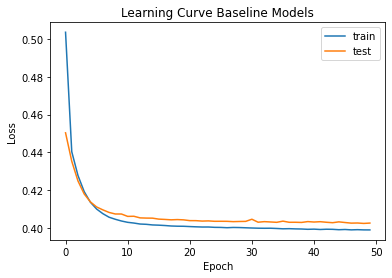

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Learning Curve Baseline Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#MODEL 2 with 4 input neurons, 64 neurons hidden layer and 1 output layer
for the 2nd model, i'll be implenting 2 hidden layer with using 64 neurons and 32 neurons. I set 64 and 32 because i commonly used 64 and 32 neuron in my hidden layer.

In [17]:
# define the keras model
model2 = Sequential()
model2.add(Dense(64, input_dim=4, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

Here i declare the model with sequential and dense. I'll be doing this 2 times with first one using the relu activation and for the ouput using sigmoid. The difference is in the first dense layer i'll be putting 64 instead of 2

In [18]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

I'll be using binary_crossentropy to calculate the loss as binary_crossentropy good for binary classification and adam optimizer as it's been the move good performing optimizer

In [25]:
history2 = model2.fit(x_train, y_train, validation_split=0.3, epochs=100, batch_size=10)

Epoch 1/100
2462/2462 [==============================] - 5s 2ms/step - loss: 0.3755 - accuracy: 0.8264 - val_loss: 0.3866 - val_accuracy: 0.8192
Epoch 2/100
2462/2462 [==============================] - 5s 2ms/step - loss: 0.3745 - accuracy: 0.8262 - val_loss: 0.3867 - val_accuracy: 0.8189
Epoch 3/100
2462/2462 [==============================] - 5s 2ms/step - loss: 0.3754 - accuracy: 0.8260 - val_loss: 0.3854 - val_accuracy: 0.8200
Epoch 4/100
2462/2462 [==============================] - 5s 2ms/step - loss: 0.3743 - accuracy: 0.8262 - val_loss: 0.3848 - val_accuracy: 0.8198
Epoch 5/100
2462/2462 [==============================] - 5s 2ms/step - loss: 0.3742 - accuracy: 0.8267 - val_loss: 0.3865 - val_accuracy: 0.8215
Epoch 6/100
2462/2462 [==============================] - 5s 2ms/step - loss: 0.3746 - accuracy: 0.8263 - val_loss: 0.3888 - val_accuracy: 0.8189
Epoch 7/100
2462/2462 [==============================] - 5s 2ms/step - loss: 0.3742 - accuracy: 0.8264 - val_loss: 0.3894 - val_ac

In [26]:
# evaluate the keras model
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1]*100)

Test loss: 0.3865445852279663
Test accuracy: 82.597815990448


After that we wil be evaluating the model using couple of methods. First we will see the testing loss and accuracy. In this model, we achieve testing loss of 0.38 and test accuracy of 82.59

In [27]:
Y_pred2 = model2.predict(x_test)
index = 0
for i in Y_pred:
  if Y_pred2[index] < 0.5:
    Y_pred2[index] = 0
  else:
    Y_pred2[index] = 1
  index = index+1
Y_pred2 = Y_pred2.astype(np.int)

we will make y_pred for the evaluating of the model. Because of the model.predict will give float result. so we will be changing the value. if < 0.5 we will changing the value to 0 and if >0.5 we will be changing the value to 1.

In [28]:
matrix2 = confusion_matrix(y_test, Y_pred2)
matrix2

array([[6392,  317],
       [1213,  870]])

The other method to evaluate the model is by confusion matrix.


*   True Positive(TP) : 6392
*   False Positive(FP) : 317
*   False Negative(FN) : 1213
*   True Negative(TN)  : 870

With the data above we can see the model excels is way better than the first model in finding output(0) while worse in finding ouput (1) .



In [29]:
print(classification_report(y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6709
           1       0.73      0.42      0.53      2083

    accuracy                           0.83      8792
   macro avg       0.79      0.69      0.71      8792
weighted avg       0.82      0.83      0.81      8792



As shown above, the output 0(<50k) have a better scores than the output(>50k)

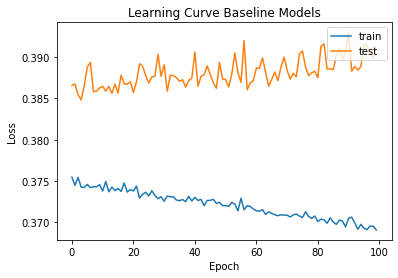

In [30]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title('Learning Curve Baseline Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#Conlusion

In [31]:
#A
score = model.evaluate(x_test, y_test, verbose=0)
print('Model 1 Performance')
print('===================')
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)
print()
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Model 2 Performance')
print('===================')
print('Test loss:', score2[0])
print('Test accuracy:', score2[1]*100)

Model 1 Performance
Test loss: 0.3939332962036133
Test accuracy: 81.67652487754822

Model 2 Performance
Test loss: 0.3865445852279663
Test accuracy: 82.597815990448


As shown above, the increase of hidden layers and number of epoch affect the accuracy of the model. Model 2 with more hidden layers and epochs have a slightly increase in accuarcy.

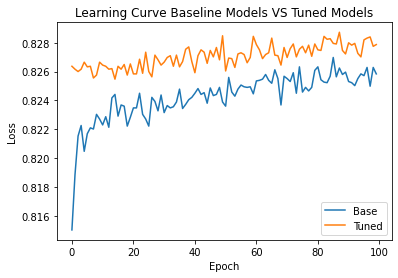

In [33]:
plt.plot(history.history['accuracy'], label='base')
plt.plot(history2.history['accuracy'], label='tuned')
plt.title('Learning Curve Baseline Models VS Tuned Models')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Base', 'Tuned'], loc='lower right')
plt.show()

In [34]:
#B
print('Model 1 Performance')
print('===================')
print(confusion_matrix(y_test, Y_pred))
print()
print(classification_report(y_test, Y_pred))
print()
print('Model 2 Performance')
print('===================')
print(confusion_matrix(y_test, Y_pred2))
print()
print(classification_report(y_test, Y_pred2))

Model 1 Performance
[[6352  357]
 [1254  829]]

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6709
           1       0.70      0.40      0.51      2083

    accuracy                           0.82      8792
   macro avg       0.77      0.67      0.70      8792
weighted avg       0.80      0.82      0.80      8792


Model 2 Performance
[[6392  317]
 [1213  870]]

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6709
           1       0.73      0.42      0.53      2083

    accuracy                           0.83      8792
   macro avg       0.79      0.69      0.71      8792
weighted avg       0.82      0.83      0.81      8792



As shown above, model 2 which have been increase the hidden layers and also epoch, successfuly having higher precision,recall,f1-score in both output 1 aswell output 0.